# 453 - Application Domain : In-class Exercise 1

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Import-the-data" data-toc-modified-id="Import-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the data</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#Build-Model" data-toc-modified-id="Build-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Build Model</a></span></li><li><span><a href="#Inference" data-toc-modified-id="Inference-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Inference</a></span></li></ul></div>

### Load the libraries

In [54]:
# For data loading and manipulation
import pandas as pd
import numpy as np

# For Visualization/EDA
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

# For model development
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

### Import the data

In [25]:
data = pd.read_csv("sales_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
Actual_Sales              30 non-null int64
Average_Price             30 non-null float64
Sales_Units               30 non-null int64
TV_GRP                    30 non-null int64
Display_Impressions       30 non-null int64
Search_Clicks             30 non-null int64
Distribution_ACV          30 non-null int64
Price_Reduction_Units     30 non-null int64
Trade_Promotions_Units    30 non-null int64
Seasonality               30 non-null int64
CPI                       30 non-null int64
Coupons                   30 non-null int64
dtypes: float64(1), int64(11)
memory usage: 2.9 KB


In [52]:
data['week'] = data.index
data

,Actual_Sales,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI,Coupons,week
0,2112912,3.03,697331,75,51519,10655,52,53,84,91,88,1000000,0
1,2170007,2.99,725755,107,89193,15214,73,93,92,60,74,0,1
2,2284844,2.90,787877,98,65084,18146,60,57,56,67,98,0,2
3,2257913,3.03,745186,149,55083,19640,93,75,81,71,69,0,3
4,2257829,3.05,740272,108,50503,17747,57,95,88,82,75,0,4
5,2205141,2.97,742472,125,94760,10391,83,82,91,82,97,0,5
6,2238231,2.95,758722,58,98469,19155,90,68,79,94,74,0,6
7,2282328,3.00,760776,51,90496,11068,76,55,85,70,72,0,7
8,2280046,2.87,794441,133,74801,14411,86,97,90,71,91,0,8
9,2302181,3.03,759796,140,75663,15193,73,85,85,63,80,0,9


The coupons are given out in 1st week and 18th week. They can be used within the period of 4-8 weeks.

### Explore the data

In [27]:
data.describe()

,Actual_Sales,Average_Price,Sales_Units,TV_GRP,Display_Impressions,Search_Clicks,Distribution_ACV,Price_Reduction_Units,Trade_Promotions_Units,Seasonality,CPI,Coupons
count,3.000000e+01,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.219432e+06,2.97300,746931.033333,72.300000,68353.366667,15554.800000,73.100000,76.033333,76.833333,71.000000,76.566667,66666.666667
std,9.452196e+04,0.05497,37865.227702,55.589722,15337.845224,3084.027465,13.321877,17.418744,13.926119,12.608153,12.190113,253708.131702
min,1.962898e+06,2.87000,643573.000000,0.000000,50503.000000,10391.000000,52.000000,51.000000,50.000000,50.000000,51.000000,0.000000
25%,2.157826e+06,2.93000,724758.250000,0.000000,53119.250000,12844.000000,62.000000,58.500000,67.500000,63.000000,69.500000,0.000000
50%,2.248030e+06,2.99000,753556.000000,80.000000,64913.000000,15471.500000,73.000000,77.500000,80.500000,67.500000,77.500000,0.000000
75%,2.284215e+06,3.01750,762695.000000,116.750000,77622.750000,18069.750000,82.750000,93.000000,88.000000,80.500000,82.750000,0.000000
max,2.341478e+06,3.05000,805646.000000,149.000000,98469.000000,19970.000000,100.000000,100.000000,95.000000,94.000000,98.000000,1000000.000000


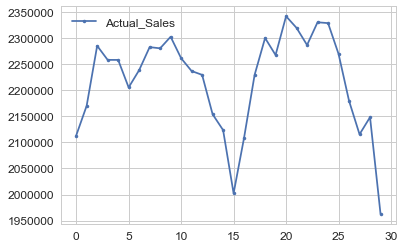

In [48]:
sns.set(style="whitegrid", font_scale=1.2)
data[['Actual_Sales']].plot(style='.-')

Sales starts increasing between week 1-10 (minor dip in 6), starts decreasing after 10th week and extremely low in 16th week. The pattern repeats in next 15 weeks.

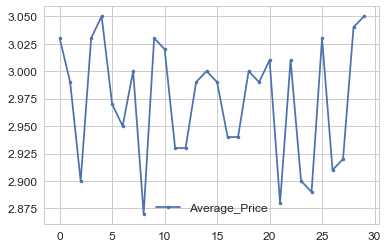

In [37]:
data[['Average_Price']].plot(style='.-')

Average price fluctuates but doesn't correlate with the sales pattern. The range of fluctuation is small, 2.87-3.05.

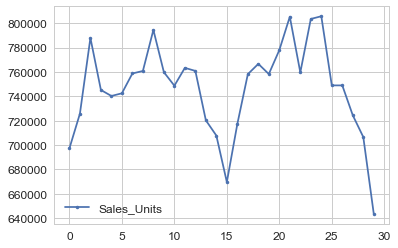

In [38]:
data[['Sales_Units']].plot(style='.-')

Sales units follows the exact same pattern as $ sales, and price did not have very high fluctuations corresponding to the pattern, so maybe other variables like advertising are affecting the sales.

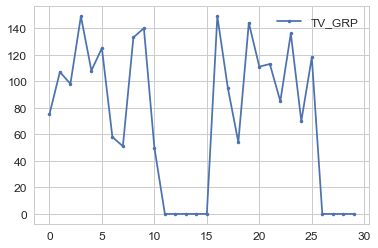

In [39]:
data[['TV_GRP']].plot(style='.-')

TV GRPs are not bought between week 12-16. Same in weeks 27-30. Looks like reduction in TV advertising might have led to sales decrease.

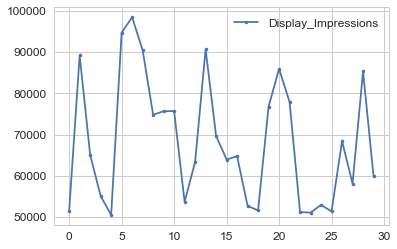

In [40]:
data[['Display_Impressions']].plot(style='.-')

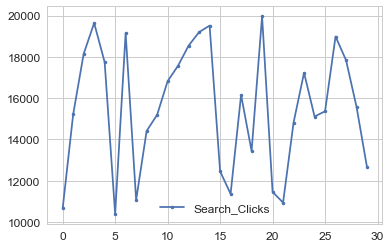

In [41]:
data[['Search_Clicks']].plot(style='.-')

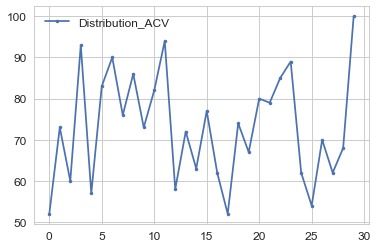

In [42]:
data[['Distribution_ACV']].plot(style='.-')

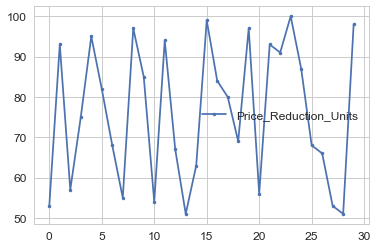

In [43]:
data[['Price_Reduction_Units']].plot(style='.-')

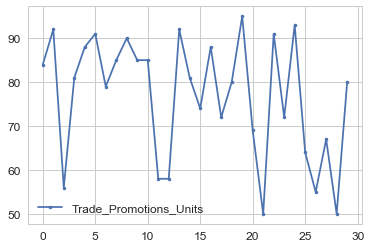

In [44]:
data[['Trade_Promotions_Units']].plot(style='.-')

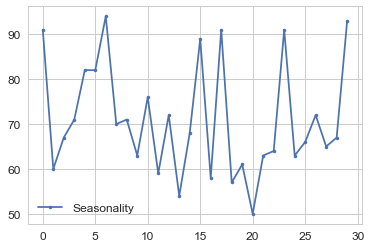

In [45]:
data[['Seasonality']].plot(style='.-')

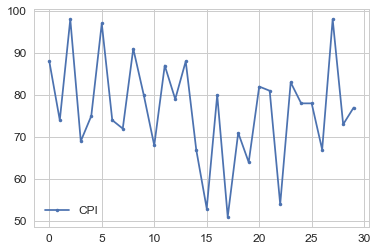

In [46]:
data[['CPI']].plot(style='.-')

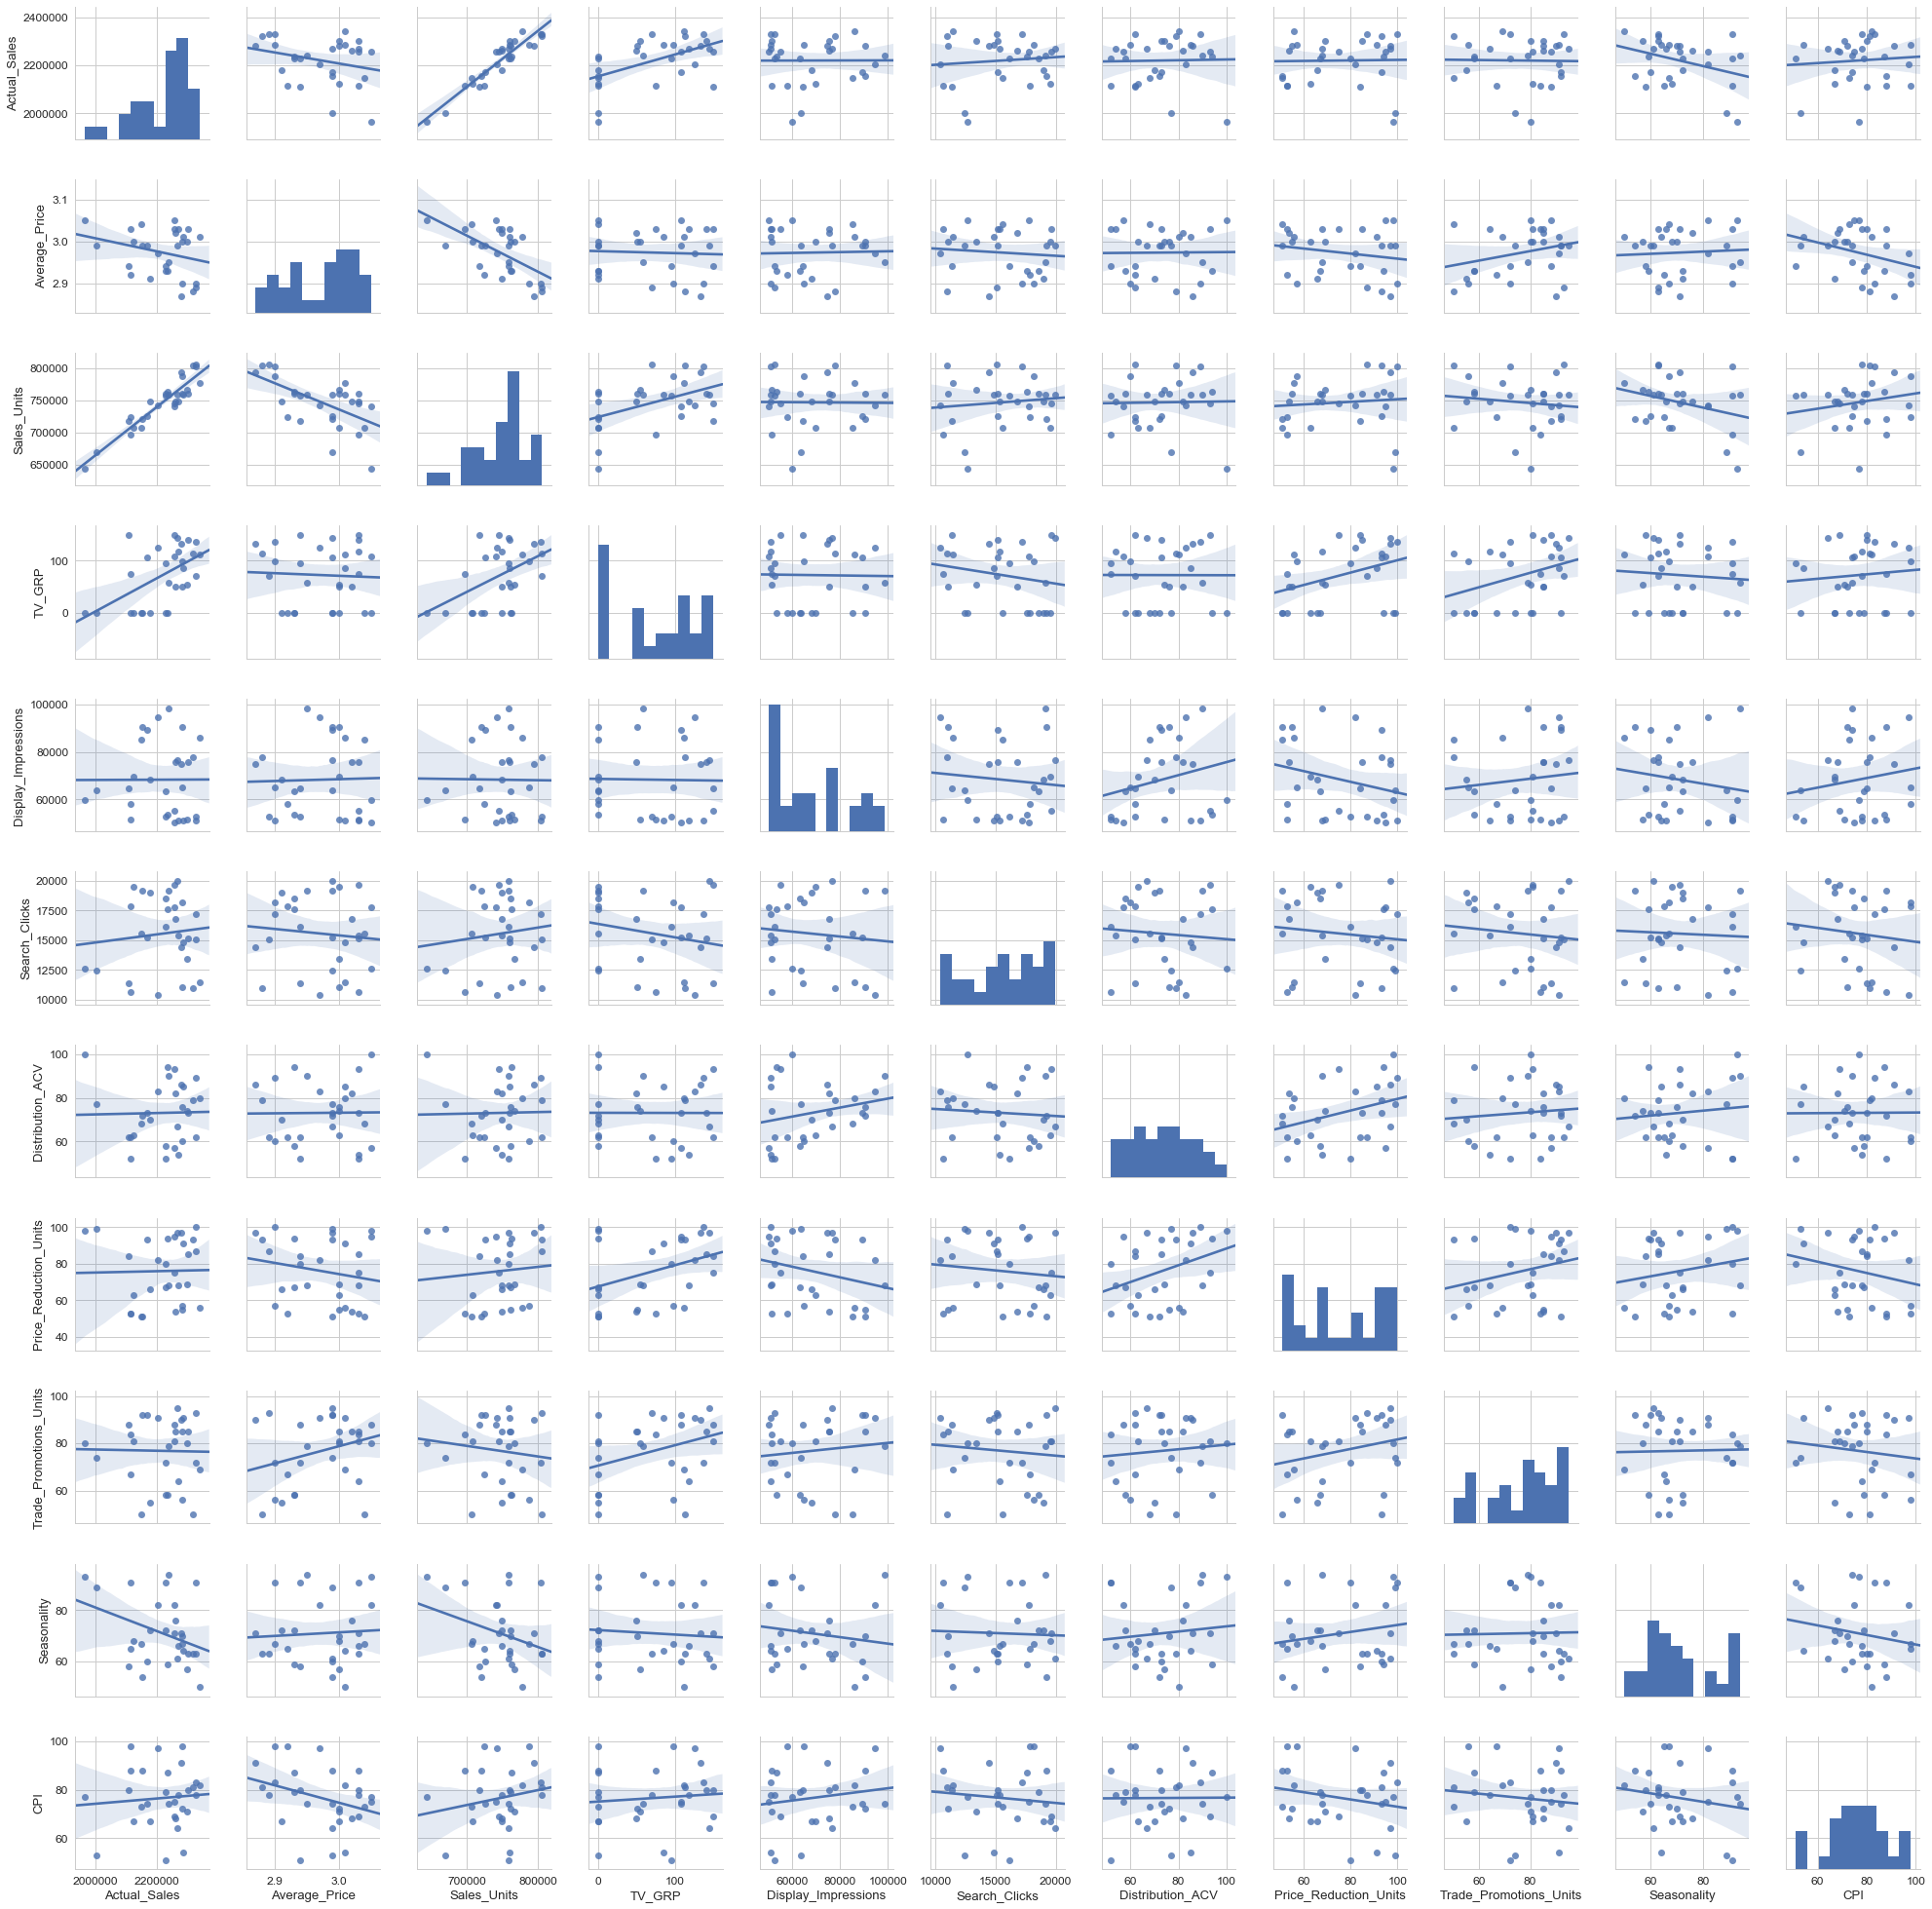

In [50]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.pairplot(data[['Actual_Sales','Average_Price','Sales_Units','TV_GRP','Display_Impressions','Search_Clicks',
                   'Distribution_ACV','Price_Reduction_Units','Trade_Promotions_Units','Seasonality','CPI']],kind='reg')

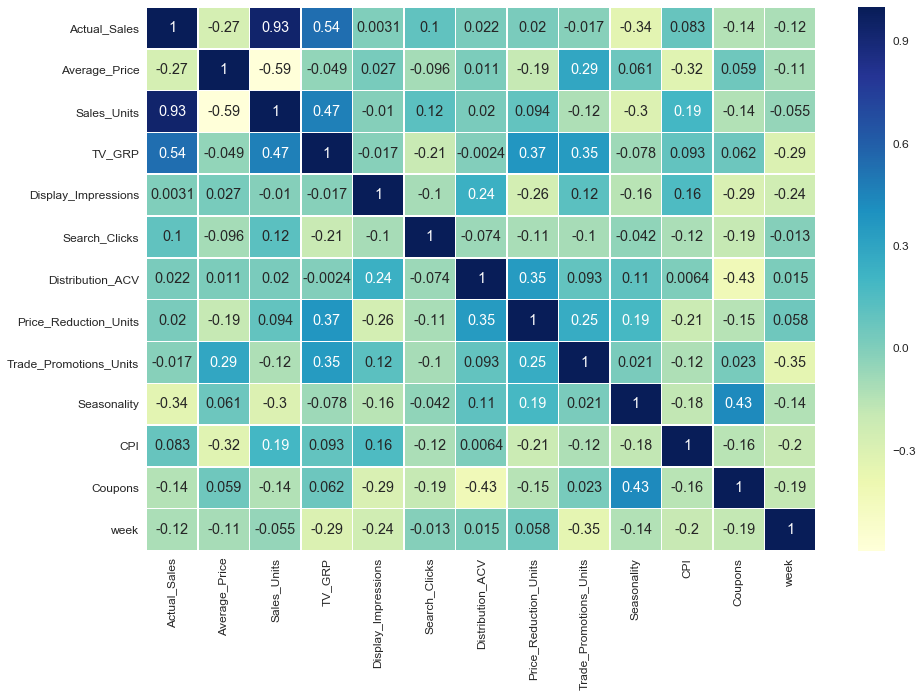

In [51]:
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

### Build Model

In [55]:
features = data[['Average_Price','Sales_Units','TV_GRP','Display_Impressions','Search_Clicks',
                   'Distribution_ACV','Price_Reduction_Units','Trade_Promotions_Units','Seasonality','CPI']]
response = data[['Actual_Sales']]

X_train,X_test,Y_train,Y_test = train_test_split(features,response,test_size=0.2,random_state = 1)
LR = LinearRegression()
LR.fit(X_train,Y_train)
print(LR.intercept_)
print(LR.coef_)
##### Might need to standardize variables and see if it even makes sense to build a model with 30 data points ######

[-2216398.01759416]
[[ 7.49200791e+05  2.97012671e+00  1.12982166e+01  2.68863632e-02
   1.00638822e-01 -2.21015790e+01 -3.29508733e+01 -4.58081490e+00
  -6.76714794e+01 -6.22910216e+01]]


### Inference